# Capstone - Word Analysis 
Author - Udita Bajaj
Part 1 - Working with Scaped Dataset and Word Analysis 

### Part 1 - Word analysis 
In this notebook, I use the tweepy package to scrape 2000 tweets from the twitter database and conduct word representation on the collected tweets.

In [ ]:
#import packages tweepy and json 
import tweepy
import json

In [357]:
#check verion of tweepy
tweepy.__version__

'4.4.0'

In [363]:
#Twitter API key, API secret, and Access token
my_api_key = "td5CrIGPPdhJ0UtbWAGbOYLMt"
my_api_secret = "lqAaBq3pmnPWVoig0KeLGoOAtPLtVzLsHZwx33Hmg1K1FIeE1D"
access_token = "2454170918-za4u6L5gcW3hTUlmrSgTnxINeCsv1bvZ031tGqm"
access_token_secret = "rDflE4xa11LBkJWvmyZ35VDDmL7cj9TEyyq2ZG1L9vBIF"

# authenticate using tweepy and initialise API
auth = tweepy.OAuthHandler(my_api_key, my_api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [364]:
#twitter BEARER token 
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAMvjWwEAAAAAZ4ybc8zhp2Ak1B74B7xzGjHIHyI%3DHIMySm2sdcupZeIE8eVAT647vosNJr8e1fGfwM8VTwf8MmdKjP"
client = tweepy.Client(bearer_token= BEARER_TOKEN)

In [433]:
#create query to extact tweets with hashtags #COVID19, #coronavirus, #quarantine. 
#Specifiy language as english, exclude retweets and replies 
query = 'has:geo #COVID19 -is:retweet -RT lang:en OR #coronavirus -is:retweet -RT lang:en OR #quarantine -is:retweet -RT lang:en'


In [434]:
#use Cursor from tweepy package to scrape 2000 tweets. Specify tweet mode as "extended"
#set up list of tweets 
myTweets = []
tweets = tweepy.Cursor(api.search_tweets, q=query, tweet_mode = "extended").items(2000)  

In [659]:
#use for loop to go through all the collected tweets and append to list 
#print length of tweets to check if all 2000 tweets have been scraped and appended
for tweet in tweets:
    myTweets.append(tweet)
    
print("Total Tweets fetched:", len(myTweets)) 

In [370]:
#convert to json 
covidTweetsJson = [tweet._json for tweet in myTweets]

In [371]:
#dump json file as 'covid_tweets_query5'
with open('covid_tweets_query5.json', 'w') as outputF:
    json.dump(covidTweetsJson, outputF)

### Read tweets from json file 

Now that we have dumped the appended list of tweets and its attributes into a json file, we create a function to read thr tweets from the file. This function returns the tweets and its attributes. 

In [375]:
def read_tweets(filePath):
    """Return tweets from JSON file."""
    with open(filePath, 'r') as inFile:
        tweets = json.load(inFile)
        print("File '{}' has {} tweets.".format(filePath, len(tweets)))
        return tweets

In [376]:
covidTweets = read_tweets("covid_tweets_query5.json")

File 'covid_tweets_query5.json' has 2000 tweets.


In [660]:
#test a tweet by specifying its index 
tweet = covidTweets[742]
print(json.dumps(tweet, indent=4, sort_keys=True))

In [378]:
#check what attributes it has 
for key in tweet:
    print("Type = {} for value of {}.".format(type(tweet[key]).__name__, key))

Type = str for value of created_at.
Type = int for value of id.
Type = str for value of id_str.
Type = str for value of full_text.
Type = bool for value of truncated.
Type = list for value of display_text_range.
Type = dict for value of entities.
Type = dict for value of metadata.
Type = str for value of source.
Type = NoneType for value of in_reply_to_status_id.
Type = NoneType for value of in_reply_to_status_id_str.
Type = NoneType for value of in_reply_to_user_id.
Type = NoneType for value of in_reply_to_user_id_str.
Type = NoneType for value of in_reply_to_screen_name.
Type = dict for value of user.
Type = NoneType for value of geo.
Type = NoneType for value of coordinates.
Type = NoneType for value of place.
Type = NoneType for value of contributors.
Type = bool for value of is_quote_status.
Type = int for value of quoted_status_id.
Type = str for value of quoted_status_id_str.
Type = dict for value of quoted_status.
Type = int for value of retweet_count.
Type = int for value of f

In [379]:
#print out the entities and hashtags of the specified tweet to better understand some attributes 
tweet["entities"]['hashtags']

[{'text': 'ToriesPartiedWhilePeopleDied', 'indices': [120, 149]},
 {'text': 'ToriesOut', 'indices': [150, 160]},
 {'text': 'ToriesUnfitToGovern', 'indices': [161, 181]},
 {'text': 'COVID19', 'indices': [182, 190]}]

### Extracting relevant information of tweet 
In this section, we extract relevant information of the tweet (the text of the tweet and some of its attributes) and convert it to a dataframe to be used for further analysis.
We have spcifiec the list of relevant attributes to incude - the data of creation of the tweet, the full text of the tweet, the text range of the tweet, the source of the tweet, the entitities of the tweet, and the user id of the user who tweeted.

In [663]:
labels = ["created_at","full_text", "display_text_range",
          "source", "entities", "user"]

In [664]:
#create function to collect the tweet and the features in the form of an ordered dictionary 
from collections import OrderedDict

def get_features(tweet, featuresLst):
    """Given a tweet return a dictionary containing info about the user."""
    return OrderedDict({key: tweet[key] for key in featuresLst})

In [666]:
import pandas as pd

In [1017]:
#convert Ordered dictionary to dataframe called dftweets 
Covidhashtag = [get_features(tweet, labels) for tweet in covidTweets]
dftweets = pd.DataFrame(data=Covidhashtag, columns=labels)
dftweets  
#pd.set_option("display.max_colwidth", 200)

,created_at,full_text,display_text_range,source,entities,user
0,Tue Dec 14 20:46:38 +0000 2021,Just how many of your constituents have had the virus and died @ABridgen there is not one shred of empathy in your soul #ToriesPartiedWhilePeopleDied #ToriesOut #ToriesUnfitToGovern #COVID19 https...,"[0, 190]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","{'hashtags': [{'text': 'ToriesPartiedWhilePeopleDied', 'indices': [120, 149]}, {'text': 'ToriesOut', 'indices': [150, 160]}, {'text': 'ToriesUnfitToGovern', 'indices': [161, 181]}, {'text': 'COVID...","{'id': 840188443, 'id_str': '840188443', 'name': 'Bonnie & 🌈Holly Greyhound🌈💔😭', 'screen_name': 'HollyGreyhound', 'location': 'Nottingham U.K.', 'description': 'A sweetheart who loved cuddles OTRB..."
1,Tue Dec 14 20:46:38 +0000 2021,"* Cuomo ""American Crisis"" * An ethics committee ordered former New York Gov. Andrew Cuomo to pay back proceeds from his #COVID19 leadership book for using state resources to write it. #DailyVoice ...","[0, 219]","<a href=""http://www.dailyvoice.com"" rel=""nofollow"">SPTK: PutnamDV</a>","{'hashtags': [{'text': 'COVID19', 'indices': [120, 128]}, {'text': 'DailyVoice', 'indices': [184, 195]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/zVqADd7n1E', 'expanded_...","{'id': 2582876443, 'id_str': '2582876443', 'name': 'DV Putnam County', 'screen_name': 'PutnamDV', 'location': 'Putnam County, NY', 'description': 'Daily Voice Putnam County covers our friends and ..."
2,Tue Dec 14 20:46:37 +0000 2021,@joncoopertweets I'm a vet who had the anthrax vaccine years ago\n\nMade me ill 4 days after\n\nBut if u sign on the dotted line\n\nU jab up\n\n#COVID19,"[17, 144]","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","{'hashtags': [{'text': 'COVID19', 'indices': [136, 144]}], 'symbols': [], 'user_mentions': [{'screen_name': 'joncoopertweets', 'name': 'Jon Cooper 🇺🇸', 'id': 27493883, 'id_str': '27493883', 'indic...","{'id': 809384904467316736, 'id_str': '809384904467316736', 'name': 'Terence Graham', 'screen_name': 'VetCanuck', 'location': 'Canada', 'description': '#Veterans #MotherNature 🇨🇦❤⚽️👀 #ClimateEmerg..."
3,Tue Dec 14 20:46:37 +0000 2021,"* Cuomo ""American Crisis"" * An ethics committee ordered former New York Gov. Andrew Cuomo to pay back proceeds from his #COVID19 leadership book for using state resources to write it. #DailyVoice ...","[0, 219]","<a href=""http://www.dailyvoice.com"" rel=""nofollow"">SPTK: DVOrangeCounty</a>","{'hashtags': [{'text': 'COVID19', 'indices': [120, 128]}, {'text': 'DailyVoice', 'indices': [184, 195]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/baVXF4pFt6', 'expanded_...","{'id': 879726564388241408, 'id_str': '879726564388241408', 'name': 'DV Orange County', 'screen_name': 'DVOrangeCounty', 'location': '', 'description': '', 'url': None, 'entities': {'description': ..."
4,Tue Dec 14 20:46:37 +0000 2021,"* Cuomo ""American Crisis"" * An ethics committee ordered former New York Gov. Andrew Cuomo to pay back proceeds from his #COVID19 leadership book for using state resources to write it. #DailyVoice ...","[0, 219]","<a href=""https://dailyvoice.com/"" rel=""nofollow"">William Travis Hardman</a>","{'hashtags': [{'text': 'COVID19', 'indices': [120, 128]}, {'text': 'DailyVoice', 'indices': [184, 195]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yqn4w3jH2E', 'expanded_...","{'id': 1120343072343298048, 'id_str': '1120343072343298048', 'name': 'Daily Voice Nassau County', 'screen_name': 'DailyNassau', 'location': '', 'description': '', 'url': None, 'entities': {'descri..."
...,...,...,...,...,...,...
1995,Tue Dec 14 18:45:33 +0000 2021,"I think, people are about to wake up from their sleep about #Covid19 \nIf governments don't stop with their despicable mandatory vaccination agenda, then they are going to collapse. New world is c...","[0, 279]","<a href=""https://mobile.twitter.co

### Generating word clouds

To find the most commonly used words in the tweet text, in this section I plot a word cloud. This word cloud consists of scraped tweets, which are tweets from December 2021. 

In [1018]:
#installing and importing packages - nltk, textblob, nltk.corpus, stopwords
!pip install textblob 
import nltk, textblob
from nltk.corpus import stopwords 
from textblob import TextBlob

In [389]:
#download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/udita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [390]:
#this includes all the stopwords in the English language since all of our tweets are in the English language 
engSW = stopwords.words('english')

In [391]:
def updateStopWords(lang, wList):
    """Given language and a list of words, function allows to 
    tweak the wordcloud by removing frequent words 
    that don't provide interesting information """
    
    lSW = stopwords.words(lang)
    return lSW + wList

In [392]:
nSW = updateStopWords('english', ['normal', 'wiki', 'parser', 'output'])

In [395]:
def plotWordCloud(wcloud):
    """Plot a default wordcloud"""
    plt.figure() 
    plt.imshow(wcloud, interpolation="bilinear") 
    plt.axis("off") 
    plt.margins(x=0, y=0) 
    plt.show() 

In [396]:
def createWordCloud(text, stopwords, w, h, colour, cMap):
    """Parameters: text (string), the set of stopwords, the filename, 
    the size of the image (width and height), background color, and colourmap."""
    wCloud = WordCloud(stopwords = stopwords, width = w, 
                       height = h, colormap = cMap, background_color=colour,
                       min_font_size = 10).generate(' '.join(dftweets[text])) 
    plotWordCloud(wCloud)

In [642]:
#create list to update stopwords 
nSW = updateStopWords('english', ['Retrieved', 'https', 'CO', 'C O' 'get', 'us', 'amp',
                                        'original', 'U', 'b', 'Archived', 'year', 'parser', 'output', 'RT', 'amp', 'Covid-19', 'Covid 19','COVID19','COVID-19', 'COVID 19', 'coronavirus', 'covid'])

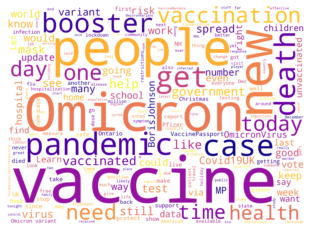

In [643]:
createWordCloud("full_text", nSW, 2250, 1650, 'white', 'plasma') 

The process of creating a wordcloud highlights the importance of removing stopwords. For convenience purposes going forward, i create a new column called 'tweet_without_stopwords', using a lambda function. This takes in the list of stopwords called 'nSW'.  

In [1002]:
nSW = updateStopWords('english', [ 'wiki', 'parser', 'get', 'this', 'like', 'This', 'one', 'output', '#', 'COVID19', 'Covid19', 'covid19', '--', 'been', '.', 'https', ':','her', 'na', '', 'no', 'i', 'of', 'by', 'he', 'is', 'at', 'lee', 'may', 're', 't', 's', 'm', 're.', "it's"])

In [1019]:
dftweets['tweet_without_stopwords'] = dftweets['full_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nSW)]))
dftweets

,created_at,full_text,display_text_range,source,entities,user,tweet_without_stopwords
0,Tue Dec 14 20:46:38 +0000 2021,Just how many of your constituents have had the virus and died @ABridgen there is not one shred of empathy in your soul #ToriesPartiedWhilePeopleDied #ToriesOut #ToriesUnfitToGovern #COVID19 https...,"[0, 190]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","{'hashtags': [{'text': 'ToriesPartiedWhilePeopleDied', 'indices': [120, 149]}, {'text': 'ToriesOut', 'indices': [150, 160]}, {'text': 'ToriesUnfitToGovern', 'indices': [161, 181]}, {'text': 'COVID...","{'id': 840188443, 'id_str': '840188443', 'name': 'Bonnie & 🌈Holly Greyhound🌈💔😭', 'screen_name': 'HollyGreyhound', 'location': 'Nottingham U.K.', 'description': 'A sweetheart who loved cuddles OTRB...",Just many constituents virus died @ABridgen shred empathy soul #ToriesPartiedWhilePeopleDied #ToriesOut #ToriesUnfitToGovern #COVID19 https://t.co/TQqx8puLEs
1,Tue Dec 14 20:46:38 +0000 2021,"* Cuomo ""American Crisis"" * An ethics committee ordered former New York Gov. Andrew Cuomo to pay back proceeds from his #COVID19 leadership book for using state resources to write it. #DailyVoice ...","[0, 219]","<a href=""http://www.dailyvoice.com"" rel=""nofollow"">SPTK: PutnamDV</a>","{'hashtags': [{'text': 'COVID19', 'indices': [120, 128]}, {'text': 'DailyVoice', 'indices': [184, 195]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/zVqADd7n1E', 'expanded_...","{'id': 2582876443, 'id_str': '2582876443', 'name': 'DV Putnam County', 'screen_name': 'PutnamDV', 'location': 'Putnam County, NY', 'description': 'Daily Voice Putnam County covers our friends and ...","* Cuomo ""American Crisis"" * An ethics committee ordered former New York Gov. Andrew Cuomo pay back proceeds #COVID19 leadership book using state resources write it. #DailyVoice https://t.co/zVqADd..."
2,Tue Dec 14 20:46:37 +0000 2021,@joncoopertweets I'm a vet who had the anthrax vaccine years ago\n\nMade me ill 4 days after\n\nBut if u sign on the dotted line\n\nU jab up\n\n#COVID19,"[17, 144]","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","{'hashtags': [{'text': 'COVID19', 'indices': [136, 144]}], 'symbols': [], 'user_mentions': [{'screen_name': 'joncoopertweets', 'name': 'Jon Cooper 🇺🇸', 'id': 27493883, 'id_str': '27493883', 'indic...","{'id': 809384904467316736, 'id_str': '809384904467316736', 'name': 'Terence Graham', 'screen_name': 'VetCanuck', 'location': 'Canada', 'description': '#Veterans #MotherNature 🇨🇦❤⚽️👀 #ClimateEmerg...",@joncoopertweets I'm vet anthrax vaccine years ago Made ill 4 days But u sign dotted line U jab #COVID19
3,Tue Dec 14 20:46:37 +0000 2021,"* Cuomo ""American Crisis"" * An ethics committee ordered former New York Gov. Andrew Cuomo to pay back proceeds from his #COVID19 leadership book for using state resources to write it. #DailyVoice ...","[0, 219]","<a href=""http://www.dailyvoice.com"" rel=""nofollow"">SPTK: DVOrangeCounty</a>","{'hashtags': [{'text': 'COVID19', 'indices': [120, 128]}, {'text': 'DailyVoice', 'indices': [184, 195]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/baVXF4pFt6', 'expanded_...","{'id': 879726564388241408, 'id_str': '879726564388241408', 'name': 'DV Orange County', 'screen_name': 'DVOrangeCounty', 'location': '', 'description': '', 'url': None, 'entities': {'description': ...","* Cuomo ""American Crisis"" * An ethics committee ordered former New York Gov. Andrew Cuomo pay back proceeds #COVID19 leadership book using state resources write it. #DailyVoice https://t.co/baVXF4..."
4,Tue Dec 14 20:46:37 +0000 2021,"* Cuomo ""American Crisis"" * An ethics committee ordered former New York Gov. Andrew Cuomo to pay back proceeds from his #COVID19 leadership book for using state resources to write it. #DailyVoice ...","[0, 219]","<a href=""https://dailyvoice.com/"" rel=""nofollow"">William Travis Hardman</a>","{'hashtags': [{'text'

### Extract user information
For the purpose of creating visualizations later if needed, I extract relevant user information (attributes include - scren_name, name, location, desciption, geo_enabled). This allows me to visualise tweet demographics, if needed, and check for any abnormalities in the datatset - for example, I check for bots in the collected dataset. The bots are 'users' that appear to tweet a lot, but all the tweets from the bot are almost identitical. If i notice a bot that appears more than 50 times (an arbritary cut-off value), then I shall change my query to exclude tweets from the repective bot.

In [581]:
featuresUser = ["screen_name", "name", "location", "description", "geo_enabled"]

In [582]:
def get_features(tweet, featuresLst):
    """Given a tweet return a dictionary containing info about the user."""
    user = tweet['user']
    return OrderedDict({key: user[key] for key in featuresLst})

In [583]:
get_features(tweet, featuresUser)

OrderedDict([('screen_name', 'lensfocus'),
             ('name', '#ThereIsNoClimateEmergency Lensfocus'),
             ('location', 'Whitby, Ontario, Canada'),
             ('description',
              'Let’s all pretend that tweaking CO2 with a carbon tax will improve the weather - chanting begins at 7 #ONclimate'),
             ('geo_enabled', False)])

In [584]:
#convert ordered dictionary into dataframe 
userdata = [get_features(tweet, featuresUser) for tweet in covidTweets]
userdf = pd.DataFrame(data=userdata, columns=featuresUser)
userdf  

,screen_name,name,location,description,geo_enabled
0,HollyGreyhound,Bonnie & 🌈Holly Greyhound🌈💔😭,Nottingham U.K.,A sweetheart who loved cuddles OTRB 21/6/20💔Li...,False
1,PutnamDV,DV Putnam County,"Putnam County, NY",Daily Voice Putnam County covers our friends a...,False
2,VetCanuck,Terence Graham,Canada,#Veterans #MotherNature 🇨🇦❤⚽️👀\n#ClimateEmerg...,True
3,DVOrangeCounty,DV Orange County,,,False
4,DailyNassau,Daily Voice Nassau County,,,False
...,...,...,...,...,...
1995,SpiritualCrypt1,Alpha-Wizz the #NFT Pro🅕,Tweets are not Financialadvice,Dad and husband\nPrometheus of Fantom! \n\nI c...,False
1996,InfectDisNews,Infectious Disease News,"Thorofare, NJ","The content you need, when you need it.",False
1997,UHANDPartners,UHAND,"Houston, TX",@UHouston & @MDAndersonNews collaboration desi...,False
1998,Faal_26,Mohamed Falih Ali,Maldives,"Soldier, MBBS, MD Pulmonology, 🇲🇻 first",False


In [585]:
#check locations of tweets and their frequency
userdf['location'].value_counts() 

                                442
United Kingdom                   29
New York, NY                     23
Whitby, Ontario, Canada          21
United States                    19
                               ... 
Mississauga, Ontario, CANADA      1
Oxford🇬🇧Melbourne🇦🇺               1
Baton Rouge, La.                  1
The People’s Republic             1
Indianapolis, IN                  1
Name: location, Length: 927, dtype: int64

In [587]:
#check for bots by check creen names of all users and their frequencies
userdf['screen_name'].value_counts() 

lensfocus          21
zoominfire         18
COVIDLive          15
sandropacheco71     8
AYedioglu           7
                   ..
TGAnnaWade          1
Kriswalmart         1
DrSpockets          1
moderatedew         1
NewstalkFM          1
Name: screen_name, Length: 1634, dtype: int64

Even though 'lensfocus' appears more than multiple other users do, the frequency isn;t significant enough to remove ther user from the database. 

In [589]:
#join dataframs of user information and tweet information to create a comprehensive database 
newdf = userdf.join(dftweets)

In [590]:
newdf

,screen_name,name,location,description,geo_enabled,created_at,full_text,display_text_range,source,entities,user,tweet_without_stopwords
0,HollyGreyhound,Bonnie & 🌈Holly Greyhound🌈💔😭,Nottingham U.K.,A sweetheart who loved cuddles OTRB 21/6/20💔Li...,False,Tue Dec 14 20:46:38 +0000 2021,Just how many of your constituents have had th...,"[0, 190]","<a href=""http://twitter.com/download/iphone"" r...",{'hashtags': [{'text': 'ToriesPartiedWhilePeop...,"{'id': 840188443, 'id_str': '840188443', 'name...",Just many constituents virus died @ABridgen sh...
1,PutnamDV,DV Putnam County,"Putnam County, NY",Daily Voice Putnam County covers our friends a...,False,Tue Dec 14 20:46:38 +0000 2021,"* Cuomo ""American Crisis"" * An ethics committe...","[0, 219]","<a href=""http://www.dailyvoice.com"" rel=""nofol...","{'hashtags': [{'text': 'COVID19', 'indices': [...","{'id': 2582876443, 'id_str': '2582876443', 'na...","* Cuomo ""American Crisis"" * An ethics committe..."
2,VetCanuck,Terence Graham,Canada,#Veterans #MotherNature 🇨🇦❤⚽️👀\n#ClimateEmerg...,True,Tue Dec 14 20:46:37 +0000 2021,@joncoopertweets I'm a vet who had the anthrax...,"[17, 144]","<a href=""http://twitter.com/download/android"" ...","{'hashtags': [{'text': 'COVID19', 'indices': [...","{'id': 809384904467316736, 'id_str': '80938490...",@joncoopertweets I'm vet anthrax vaccine years...
3,DVOrangeCounty,DV Orange County,,,False,Tue Dec 14 20:46:37 +0000 2021,"* Cuomo ""American Crisis"" * An ethics committe...","[0, 219]","<a href=""http://www.dailyvoice.com"" rel=""nofol...","{'hashtags': [{'text': 'COVID19', 'indices': [...","{'id': 879726564388241408, 'id_str': '87972656...","* Cuomo ""American Crisis"" * An ethics committe..."
4,DailyNassau,Daily Voice Nassau County,,,False,Tue Dec 14 20:46:37 +0000 2021,"* Cuomo ""American Crisis"" * An ethics committe...","[0, 219]","<a href=""https://dailyvoice.com/"" rel=""nofollo...","{'hashtags': [{'text': 'COVID19', 'indices': [...","{'id': 1120343072343298048, 'id_str': '1120343...","* Cuomo ""American Crisis"" * An ethics committe..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,SpiritualCrypt1,Alpha-Wizz the #NFT Pro🅕,Tweets are not Financialadvice,Dad and husband\nPrometheus of Fantom! \n\nI c...,False,Tue Dec 14 18:45:33 +0000 2021,"I think, people are about to wake up from thei...","[0, 279]","<a href=""https://mobile.twitter.com"" rel=""nofo...","{'hashtags': [{'text': 'Covid19', 'indices': [...","{'id': 962273713562537984, 'id_str': '96227371...","I think, people wake sleep #Covid19 If governm..."
1996,InfectDisNews,Infectious Disease News,"Thorofare, NJ","The content you need, when you need it.",False,Tue Dec 14 18:45:30 +0000 2021,A final analysis confirmed that Pfizer’s inves...,"[0, 253]","<a href=""https://www.healio.com"" rel=""nofollow...","{'hashtags': [{'text': 'COVID19', 'indices': [...","{'id': 67008915, 'id_str': '67008915', 'name':...",A final analysis confirmed Pfizer’s investigat...
1997,UHANDPartners,UHAND,"Houston, TX",@UHouston & @MDAndersonNews collaboration desi...,False,Tue Dec 14 18:45:24 +0000 2021,We are pleased to announce that our paper deta...,"[0, 227]","<a href=""https://mobile.twitter.com"" rel=""nofo...","{'hashtags': [{'text': 'COVID19', 'indices': [...","{'id': 917490336993370112, 'id_str': '91749033...",We pleased announce paper detailing impacts #C...
1998,Faal_26,Mohamed Falih Ali,Maldives,"Soldier, MBBS, MD Pulmonology, 🇲🇻 first",False,Tue Dec 14 18:45:22 +0000 2021,An analysis by the largest private health insu...,"[0, 273]","<a href=""http://twitter.com/download/iphone"" r...","{'hashtags': [{'text': 'COVID19', 'indices': [...","{'id': 997946454718144512, 'id_str': '99794645...",An analysis largest private health insurance c...


### Most common words used 
I analyse word frequency and create a histogram of the most commonly occuring words.

In [4]:
pip install --user -U nltk

Note: you may need to restart the kernel to use updated packages.


In [5]:
#import nltk and download 'punkt'
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/udita/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
#extract words from all tweets separated by space
mycount = newdf['tweet_without_stopwords'].str.cat(sep=' ')

In [668]:
words = nltk.tokenize.word_tokenize(mycount)

In [595]:
#create word distribution dataframe which include word, its frequency, length/count of the word 
word_dist = nltk.FreqDist(words)
dff = pd.DataFrame(word_dist.most_common(), 
                    columns=['Word', 'Frequency'])
dff['Word_Count'] = dff.Word.apply(len)
dff

,Word,Frequency,Word_Count
0,#,6844,1
1,.,2147,1
2,:,2140,1
3,COVID19,1665,7
4,https,1638,5
...,...,...,...
13537,reinfection,1,11
13538,lesser,1,6
13539,ascertain,1,9
13540,approx,1,6


In [596]:
#remove words that have length 1 or 2
dfnew = dff[dff['Word_Count'] != 1] 
dfnew2 = dfnew[dfnew['Word_Count'] != 2]
dfnew2

In [598]:
dfnew3 = dfnew2.iloc[4: , :]
dfnew3

,Word,Frequency,Word_Count
15,Omicron,237,7
18,vaccine,196,7
20,people,185,6
21,Covid19,180,7
23,covid19,160,7
...,...,...,...
13537,reinfection,1,11
13538,lesser,1,6
13539,ascertain,1,9
13540,approx,1,6


In [602]:
#exclude indicator words from the dataframe, including Covid19 hashtags and its variations
dfnew3 = dfnew3[dfnew3["Word"] != 'Covid19']
dfnew3 = dfnew3[dfnew3["Word"] != 'covid19']
dfnew3 = dfnew3[dfnew3["Word"] != 'Covid']
dfnew3 = dfnew3[dfnew3["Word"] != 'COVID']
dfnew3 = dfnew3[dfnew3["Word"] != 'coronavirus']
dfnew3

,Word,Frequency,Word_Count
15,Omicron,237,7
18,vaccine,196,7
20,people,185,6
24,cases,157,5
25,new,144,3
...,...,...,...
13537,reinfection,1,11
13538,lesser,1,6
13539,ascertain,1,9
13540,approx,1,6


In [603]:
dfnew3[:20]

,Word,Frequency,Word_Count
15,Omicron,237,7
18,vaccine,196,7
20,people,185,6
24,cases,157,5
25,new,144,3
30,COVID-19,116,8
31,pandemic,116,8
33,vaccines,104,8
35,vaccinated,94,10
39,deaths,84,6


In [2]:
#import plotly.expresss
import plotly.express as px

In [10]:
#create histogram of most common 20 words 
fig = px.histogram(dfnew3[:20], x='Word', y='Frequency', height=300, 
                    title='Most common 20 words in tweets', color_discrete_sequence=px.colors.qualitative.T10)
fig.update_yaxes(showgrid=False),
fig.update_xaxes(categoryorder='total descending')
fig.update_traces(hovertemplate=None)
fig.update_layout(margin=dict(t=100, b=0, l=70, r=40),
                        hovermode="x unified",
                        xaxis_tickangle=360,
                        xaxis_title=' ', yaxis_title=" ",
                        plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        title_font=dict(size=25, color='#a5a7ab', family="Lato, sans-serif"),
                        font=dict(color='#8a8d93'),
                         )